In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input , Conv2D, BatchNormalization,ReLU,
    MaxPooling2D,GlobalAveragePooling2D,Dense,Add)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [22]:
# Load and preprocess Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and add channel dimension
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Building the model

In [23]:
inputs = Input(shape=(28, 28, 1))
x = Conv2D(64,(7,7),strides=2,padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((3,3),strides=2,padding = 'same')(x)

1st Residual Block

In [ ]:
shortcut = x
x = Conv2D(64,(3,3),strides = 2,padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(64,(3,3),strides=(2),padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,shortcut])
x = ReLU()(x)

2nd Residual Block

In [ ]:
shortcut = Conv2D(128,(1,1),strides=2,padding = 'same')(x)
x = Conv2D(128,(3,3),strides=2,padding = 'same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(128,(3,3),strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,shortcut])
x = ReLU()(x)


3rd Residual Block

In [ ]:
shortcut = Conv2D(256,(3,3),strides=2,padding='same')(x)
x = Conv2D(256,(3,3),strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(256,(3,3),strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,shortcut])
x = ReLU()(x)


4th Residual Block

In [ ]:
shortcut = Conv2D(512,(3,3),strides=2,padding='same')(x)
x = Conv2D(512,(3,3),strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(512,(3,3),strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,shortcut])
x = ReLU()(x)

Output Layer

In [25]:
x = GlobalAveragePooling2D()(x)
output = Dense(10,activation='softmax')(x)

In [27]:
model = Model(inputs, output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 52ms/step - accuracy: 0.8000 - loss: 0.5685 - val_accuracy: 0.8430 - val_loss: 0.4317
Epoch 2/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.8853 - loss: 0.3216 - val_accuracy: 0.8735 - val_loss: 0.3551
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8663 - loss: 0.3820
Test Accuracy: 86.33%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


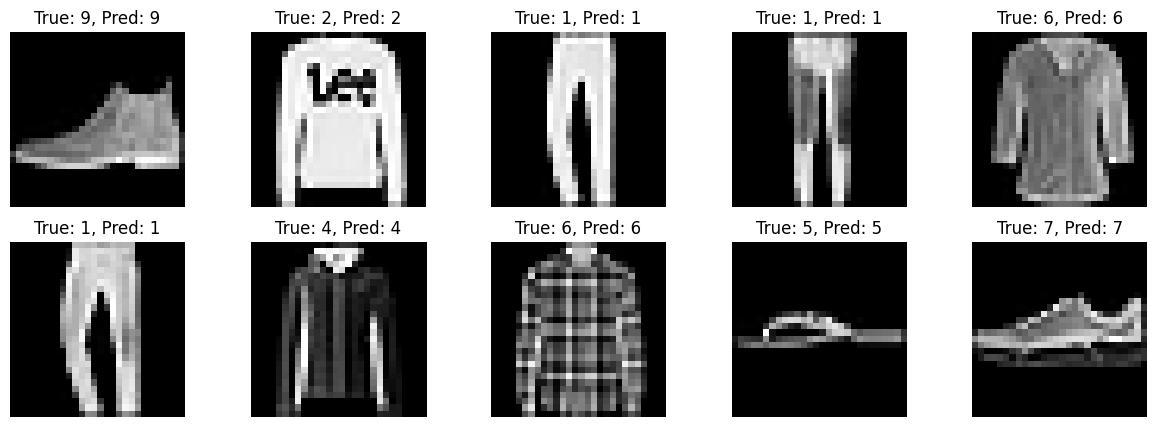

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions and true labels back to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create a DataFrame to compare actual and predicted labels
result = pd.DataFrame({
    'Actual': y_true_classes,
    'Predicted': y_pred_classes
})

# Function to plot images with actual and predicted labels
def plot_images(images, labels, predictions, idx, num=10):
    """
    Plots 'num' images starting from index 'idx'.
    :param images: The image data.
    :param labels: The actual labels.
    :param predictions: The predicted labels.
    :param idx: The starting index.
    :param num: The number of images to display.
    """
    plt.figure(figsize=(15, 5))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx + i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[idx + i]}, Pred: {predictions[idx + i]}")
        plt.axis('off')
    plt.show()

# Display the first 10 images with their actual and predicted labels
plot_images(x_test, y_true_classes, y_pred_classes, idx=0, num=10)
